In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.spatial.distance import hamming
os.chdir('..')
import functions.helperfunctions as hf
import functions.myfunctions as mf
# from functions.IPAfunctions import _calculate_weights
from PairingVDJdb_MI import _define_individuals
pd.options.mode.chained_assignment = None

In [2]:
estimatedMI = pd.read_csv('data/output/mutual_info/estimated_mutual_info_all_epitopes.csv')
estimatedMI.columns = ['name', 'real', 'shuffle']

estimatedMI[['epitope', 'vars']] = estimatedMI['name'].str.split('_', 1, expand=True)
estimatedMI[['var1','var2']] = estimatedMI['vars'].str.split('-', 1, expand=True)
estimatedMI = estimatedMI.drop(['name','vars'], axis=1)
estimatedMI['real_MI'] = estimatedMI['real'] - estimatedMI['shuffle']
estimatedMI['var1'] = estimatedMI['var1'].replace('cdr3a','CDR3a')
estimatedMI['var2'] = estimatedMI['var2'].replace('cdr3a','CDR3a')
estimatedMI['var1'] = estimatedMI['var1'].replace('cdr3b','CDR3b')
estimatedMI['var2'] = estimatedMI['var2'].replace('cdr3b','CDR3b')
print(estimatedMI)

          real    shuffle     epitope   var1   var2   real_MI
0    15.874756   7.251155   ASNENMETM     Ja  CDR3a  8.623601
1     8.277162   5.880050   ASNENMETM     Ja  CDR3b  2.397112
2     0.816246   0.603484   ASNENMETM     Ja     Jb  0.212762
3     3.891015   2.705514   ASNENMETM     Jb  CDR3a  1.185500
4     9.995252   2.261418   ASNENMETM     Jb  CDR3b  7.733834
..         ...        ...         ...    ...    ...       ...
355   5.359227   4.437795  background     Vb  CDR3a  0.921433
356   7.316673   4.229559  background     Vb  CDR3b  3.087115
357   1.086636   0.884852  background     Vb     Ja  0.201785
358   0.475710   0.346679  background     Vb     Jb  0.129030
359  22.666520  19.730775  background  CDR3a  CDR3b  2.935746

[360 rows x 6 columns]


/tmp/ipykernel_480406/3498085612.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  estimatedMI[['epitope', 'vars']] = estimatedMI['name'].str.split('_', 1, expand=True)
/tmp/ipykernel_480406/3498085612.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  estimatedMI[['var1','var2']] = estimatedMI['vars'].str.split('-', 1, expand=True)


In [3]:
cdr3abMI = estimatedMI.loc[estimatedMI['var1'].isin(['CDR3a','CDR3b'])]
cdr3abMI = cdr3abMI.loc[cdr3abMI['var1'].isin(['CDR3a','CDR3b'])]
print(cdr3abMI)

          real    shuffle           epitope   var1   var2    real_MI
14   42.514086  28.393550         ASNENMETM  CDR3a  CDR3b  14.120535
29   62.903822  42.657593         ATDALMTGF  CDR3a  CDR3b  20.246229
44   30.203834  29.848713        AVFDRKSDAK  CDR3a  CDR3b   0.355122
59   56.597613  50.543606         CINGVCWTV  CDR3a  CDR3b   6.054008
74   35.442074  34.560753        ELAGIGILTV  CDR3a  CDR3b   0.881321
89   27.019347  19.341233         GILGFVFTL  CDR3a  CDR3b   7.678114
104  49.200411  32.111785         GLCTLVAML  CDR3a  CDR3b  17.088626
119  39.556004  25.412804         HGIRNASFI  CDR3a  CDR3b  14.143200
134  34.412055  33.190943         IVTDFSVIK  CDR3a  CDR3b   1.221112
149  73.484959  57.066165         KSKRTPMGF  CDR3a  CDR3b  16.418794
164  34.993663  29.623187         LLWNGPMAV  CDR3a  CDR3b   5.370476
179  33.868407  30.642950         LSLRNPILV  CDR3a  CDR3b   3.225457
194  64.072052  57.032108         LTDEMIAQY  CDR3a  CDR3b   7.039944
209  50.498113  42.937499         

In [4]:
ff1 = 'data/output/pairing_MI-IPA/all_eps_noconf/'
ff10 = 'data/output/pairing_MI-IPA/big_eps_noconf_700/'
ff2 = 'data/output/pairing_MI-IPA/best_perf_noconf/'
ff20 = 'data/output/pairing_MI-IPA/big_eps_best_noconf_700/'

save_folder1 = 'figures/'

In [5]:
vdj = pd.read_csv('data/vdj_cleaned_subset_for_MI.csv', index_col=0).drop('Unnamed: 0', axis=1)
vdj = vdj.replace('https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#', '10xGenomics')
vdj = vdj.replace('https://github.com/antigenomics/vdjdb-db/issues/*', 'GitHubIssue', regex=True)
vdj = vdj.loc[vdj['Epitope'] != 'KLGGALQAK'] # because too big - takes forever
epitopes = vdj['Epitope'].unique().tolist()
# epcounts = vdj['Epitope'].value_counts()
# epitopes = epcounts.loc[epcounts<1000].index.values
# vdj = vdj.loc[vdj['Epitope'].isin(epitopes)]

In [6]:
# epcounts

In [7]:
for ep in epitopes:
    print(ep)
    epdf = vdj.loc[vdj['Epitope']==ep]
    print('unique alpha: ', len(epdf['CDR3-a'].unique()))
    print('unique beta: ', len(epdf['CDR3-b'].unique()))
    epdf = _define_individuals(vdj, ep, 'no')
    print('unique IDs: ', len(epdf['subject-PMID'].unique()))

ELAGIGILTV
unique alpha:  348
unique beta:  370
Using individuals as provided
unique IDs:  14
GILGFVFTL
unique alpha:  1082
unique beta:  980
Using individuals as provided
unique IDs:  56
NLVPMVATV
unique alpha:  305
unique beta:  318
Using individuals as provided
unique IDs:  48
GLCTLVAML
unique alpha:  228
unique beta:  239
Using individuals as provided
unique IDs:  20
SSLENFRAYV
unique alpha:  240
unique beta:  286
Using individuals as provided
unique IDs:  19
ASNENMETM
unique alpha:  157
unique beta:  111
Using individuals as provided
unique IDs:  28
YLQPRTFLL
unique alpha:  284
unique beta:  304
Using individuals as provided
unique IDs:  10
LLWNGPMAV
unique alpha:  202
unique beta:  220
Using individuals as provided
unique IDs:  2
CINGVCWTV
unique alpha:  214
unique beta:  218
Using individuals as provided
unique IDs:  7
KSKRTPMGF
unique alpha:  85
unique beta:  70
Using individuals as provided
unique IDs:  1
ATDALMTGF
unique alpha:  99
unique beta:  111
Using individuals as provi

In [8]:
def _calculate_weights_oneChain(A, weights):
    assert (weights in ['yes', None, 'no']) | (type(weights) == float), 'weights should be one of [yes, None, no] or a float'
    if weights == 'no':
        weights = None

    if isinstance(weights, float):
        X = A.copy()
        assert X.shape == (A.shape[0], A.shape[1])
        seqs = [''.join(row) for row in X]
        
        weights = [1/sum([int(hamming(list(x), list(y)) <= weights) for y in seqs]) for x in seqs]
        print('effective set size: ', sum(weights))
        weights = np.array(weights)
    
    return(sum(weights))

In [9]:
mode_results = pd.DataFrame()

for ff in sorted(os.listdir(ff1)):
    if ('vgene-no' in ff) & ('confidence-none' in ff):
         print(ff)
         filename = ff1+ff
      #    print(df)

         ff = ff.replace('small_ind', 'smallInd')
         ff = ff.replace('prop_test', 'propTest')
         properties = {x.split('-')[0]:x.split('-')[1] for x in ff.split('_') if '.csv' not in x}
         if properties['epitope'] in epitopes:
            epdf = _define_individuals(vdj, properties['epitope'], 'no')
            epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
            df = hf.load_df_fast(filename, epdf.shape[0])
            a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
            b = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
            b = b[:, ~np.all(b[1:] == b[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['beta'] = [''.join(x) for x in b] # then substitute original column   

            Na = _calculate_weights_oneChain(a, 0.6) 
            Nb = _calculate_weights_oneChain(b, 0.6)      

            for w in range(100):
               df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
               df_mode = df_final[['mode_freq','correct']]
               df_mode['L'] = properties['L']
               df_mode['epitope'] = properties['epitope']
               df_mode['largest_id'] = epdf['subject-PMID'].value_counts().max()
               df_mode['Na'] = Na
               df_mode['Nb'] = Nb
               df_mode['mode_iter'] = w
               mode_results = pd.concat([mode_results,df_mode])

epitope-ASNENMETM_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
34
(2010, 11)
['34']
(2010, 11)
elapsed: 3.8432600498199463
effective set size:  1.5719040244928595
effective set size:  1.4640153228439832
epitope-ASNENMETM_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
34
(2010, 11)
['34']
(2010, 11)
elapsed: 1.9026885032653809
effective set size:  1.5719040244928595
effective set size:  1.4640153228439832
epitope-ATDALMTGF_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
21
(1250, 11)
['21']
(1250, 11)
elapsed: 7.803239107131958
effective set size:  3.8989141663315916
effective set size:  1.875651477808608
epitope-ATDALMTGF_weights-0.6_L-1

In [10]:
for ff100 in sorted(os.listdir(ff10)):
    if '.txt' not in ff100:
        for ff in sorted(os.listdir(ff10 + ff100)):
            if ('.csv' in ff) & ('vgene-no' in ff) & ('KLGGALQAK' not in ff):
                print(ff)
                filename = ff10+ff100+'/'+ff
            #    print(df)

                ff = ff.replace('small_ind', 'smallInd')
                ff = ff.replace('prop_test', 'propTest')
                properties = {x.split('-')[0]:x.split('-')[1] for x in ff.split('_') if '.csv' not in x}
                if properties['epitope'] in epitopes:
                    df1 = pd.read_csv('data/big_epitopes_subsamples_700/' + properties['epitope'] + '_ss' + ff100 + '.csv')
                    epdf = _define_individuals(df1, properties['epitope'], 'no')
                    epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
                    df = hf.load_df(filename, epdf.shape[0])
                    a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
                    a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                    epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
                    b = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
                    b = b[:, ~np.all(b[1:] == b[:-1], axis=0)] # remove columns where all values are equal to first value
                    epdf['beta'] = [''.join(x) for x in b] # then substitute original column   

                    Na = _calculate_weights_oneChain(a, 0.6) 
                    Nb = _calculate_weights_oneChain(b, 0.6)      

                    for w in range(100):
                        df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
                        df_mode = df_final[['mode_freq','correct']]
                        df_mode['L'] = properties['L']
                        df_mode['epitope'] = properties['epitope'] + '_' + ff100
                        df_mode['largest_id'] = epdf['subject-PMID'].value_counts().max()
                        df_mode['Na'] = Na
                        df_mode['Nb'] = Nb
                        df_mode['mode_iter'] = w
                        mode_results = pd.concat([mode_results,df_mode])

epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 263.8734886646271
effective set size:  2.8895206875211223
effective set size:  2.348998381555852
epitope-AVFDRKSDAK_weights-0.6_L-1.0_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 193.53064846992493
effective set size:  2.8895206875211223
effective set size:  2.348998381555852
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-all_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[117]
(7000, 11)
[117]
elapsed: 164.77642703056335
effective set size:  2.9430139092525107
effective set size:  2.3587534421165715
epitope-GILGFVFTL_weights-0.6_L-1.0_method-None_prop_test-a

In [11]:
mode_results_best = pd.DataFrame()

for ff in sorted(os.listdir(ff2)):
    if ('vgene-no' in ff) & ('confidence-none' in ff):
         print(ff)
         filename = ff2+ff
      #    print(df)

         ff = ff.replace('small_ind', 'smallInd')
         ff = ff.replace('prop_test', 'propTest')
         properties = {x.split('-')[0]:x.split('-')[1] for x in ff.split('_') if '.csv' not in x}
         if properties['epitope'] in epitopes:
            epdf = _define_individuals(vdj, properties['epitope'], 'no')
            epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
            df = hf.load_df(filename, epdf.shape[0])
            a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
            a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
            b = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
            b = b[:, ~np.all(b[1:] == b[:-1], axis=0)] # remove columns where all values are equal to first value
            epdf['beta'] = [''.join(x) for x in b] # then substitute original column   

            Na = _calculate_weights_oneChain(a, 0.6) 
            Nb = _calculate_weights_oneChain(b, 0.6)      

            for w in range(100):
               df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
               df_mode = df_final[['mode_freq','correct']]
               df_mode['L'] = properties['L']
               df_mode['epitope'] = properties['epitope']
               df_mode['largest_id'] = epdf['subject-PMID'].value_counts().max()
               df_mode['Na'] = Na
               df_mode['Nb'] = Nb
               df_mode['mode_iter'] = w
               mode_results_best = pd.concat([mode_results_best,df_mode])

epitope-ASNENMETM_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(201, 11)
[0]
elapsed: 3.335094451904297


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  1.5719040244928595
effective set size:  1.4640153228439832
epitope-ATDALMTGF_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(125, 11)
[0]
elapsed: 1.3744192123413086
effective set size:  3.8989141663315916


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  1.875651477808608
epitope-CINGVCWTV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(226, 11)
[0]
elapsed: 0.4930706024169922


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.1381944289270183
effective set size:  2.6340581114935677
epitope-ELAGIGILTV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(380, 11)
[0]
elapsed: 1.2893331050872803


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.715216869963936
effective set size:  1.8657874749719372
epitope-GLCTLVAML_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(345, 11)
[0]
elapsed: 0.895207405090332


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.2351600854894746
effective set size:  2.9691381928835594
epitope-HGIRNASFI_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(243, 11)
[0]
elapsed: 1.5491535663604736


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  1.488949265010185
effective set size:  1.4144194232541032
epitope-IVTDFSVIK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(704, 11)
[0]
elapsed: 1.3395628929138184


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.7072647595900214
effective set size:  2.2945947415657675
epitope-KSKRTPMGF_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(103, 11)
[0]
elapsed: 0.5053002834320068
effective set size:  5.588947918681727
effective set size:  1.4564983056530618


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


epitope-LLWNGPMAV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(235, 11)
[0]
elapsed: 1.0073754787445068


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.5558891616655863
effective set size:  2.2943593342670887
epitope-LSLRNPILV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(127, 11)
[0]
elapsed: 0.815131664276123
effective set size:  1.7638198702082923


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.6474201936935953
epitope-LTDEMIAQY_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(124, 11)
[0]
elapsed: 0.4633674621582031
effective set size:  2.4241897053514525


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  4.856452883722323
epitope-NLVPMVATV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(357, 11)
[0]
elapsed: 0.5207748413085938


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.57327840269613
effective set size:  2.5506827410541013
epitope-RLRAEAQVK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(412, 11)
[0]
elapsed: 3.8428893089294434


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.0395063811544754
effective set size:  2.470635397915474
epitope-SPRWYFYYL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(175, 11)
[0]
elapsed: 0.5451853275299072


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.0294111802498893
effective set size:  2.7777305561851287
epitope-SSLENFRAYV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(350, 11)
[0]
elapsed: 0.9391665458679199


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  1.53003369907664
effective set size:  1.6946639822456273
epitope-SSPPMFRV_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(133, 11)
[0]
elapsed: 0.7933342456817627
effective set size:  1.9453921588191798


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.256204705180909
epitope-SSYRRPVGI_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(177, 11)
[0]
elapsed: 2.851915121078491


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  1.8043036799757988
effective set size:  1.64290711747879
epitope-TTDPSFLGRY_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(242, 11)
[0]
elapsed: 1.0496954917907715


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.0322543094279286
effective set size:  2.6448872547842686
epitope-YLQPRTFLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(333, 11)
[0]
elapsed: 0.5408530235290527


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.3640952879579893
effective set size:  3.793873636838321


In [12]:
for ff200 in sorted(os.listdir(ff20)):
    if '.txt' not in ff200:
        for ff in sorted(os.listdir(ff20 + ff200)):
            if ('.csv' in ff) & ('vgene-no' in ff) & ('KLGGALQAK' not in ff):
                print(ff)
                filename = ff20+ff200+'/'+ff
            #    print(df)

                ff = ff.replace('small_ind', 'smallInd')
                ff = ff.replace('prop_test', 'propTest')
                properties = {x.split('-')[0]:x.split('-')[1] for x in ff.split('_') if '.csv' not in x}
                if properties['epitope'] in epitopes:
                    df1 = pd.read_csv('data/big_epitopes_subsamples_700/' + properties['epitope'] + '_ss' + ff200 + '.csv')
                    epdf = _define_individuals(df1, properties['epitope'], 'no')
                    epdf = mf.prepare_data(epdf, col1='cdr3a_IMGTgaps', col2 ='cdr3b_IMGTgaps')
                    df = hf.load_df(filename, epdf.shape[0])
                    a = np.array(epdf['cdr3a_IMGTgaps_padded'].str.split(', ', expand=True))
                    a = a[:, ~np.all(a[1:] == a[:-1], axis=0)] # remove columns where all values are equal to first value
                    epdf['alpha'] = [''.join(x) for x in a] # then substitute original column
                    b = np.array(epdf['cdr3b_IMGTgaps_padded'].str.split(', ', expand=True))
                    b = b[:, ~np.all(b[1:] == b[:-1], axis=0)] # remove columns where all values are equal to first value
                    epdf['beta'] = [''.join(x) for x in b] # then substitute original column   

                    Na = _calculate_weights_oneChain(a, 0.6) 
                    Nb = _calculate_weights_oneChain(b, 0.6)      

                    for w in range(100):
                        df_final = hf.check_mode_correct_IPA(df.reset_index(),epdf)
                        df_mode = df_final[['mode_freq','correct']]
                        df_mode['L'] = properties['L']
                        df_mode['epitope'] = properties['epitope'] + '_' + ff200
                        df_mode['largest_id'] = epdf['subject-PMID'].value_counts().max()
                        df_mode['Na'] = Na
                        df_mode['Nb'] = Nb
                        df_mode['mode_iter'] = w
                        mode_results_best = pd.concat([mode_results_best,df_mode])

epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 1.3788974285125732


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.8895206875211223
effective set size:  2.348998381555852
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 1.3328123092651367


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.9430139092525107
effective set size:  2.3587534421165715
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 2.110614538192749


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.300386123515962
effective set size:  2.2435006954114938
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 2.041037082672119


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.425699552968136
effective set size:  2.4708113287167763
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 4.47432017326355


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.0491253334882558
effective set size:  2.030413798774491
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 5.703986167907715


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.384928417456039
effective set size:  1.991334906235578
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 1.4040839672088623


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  2.6288364846028176
effective set size:  2.792614617581588
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 1.3404591083526611


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.209814282525614
effective set size:  1.562537557947729
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 2.948911666870117


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.12314723395886
effective set size:  2.021628405409322
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 1.3713855743408203


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.80771701749505
effective set size:  2.4727275630916505
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 2.7951784133911133


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.202333040715463
effective set size:  1.6731433067160324
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 3.323988914489746


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.2302798508415638
effective set size:  2.019583759065057
epitope-AVFDRKSDAK_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 2.375718116760254


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.1797277612438455
effective set size:  2.328938640007117
epitope-GILGFVFTL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 2.5566258430480957


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.531421875086305
effective set size:  1.6103906940969495
epitope-RAKFKQLL_weights-0.6_L-0.6_method-None_prop_test-0_confidence-none_correlation-no_translation-no_ind-no_vgene-no_step-6_ones-keep_test.csv.gz
Using individuals as provided
[0]
(700, 11)
[0]
elapsed: 1.680267333984375


/home/marti/gitscripts/AB-interactions/functions/helperfunctions.py:32: UserWarning: fewer iteations than max
  warnings.warn('fewer iteations than max', UserWarning)


effective set size:  3.254693826313748
effective set size:  2.1106595389853693


In [13]:
gm = mode_results[['epitope','L','correct','largest_id','Na', 'Nb','mode_iter']].groupby(['epitope','L','correct','largest_id','Na', 'Nb','mode_iter']).size().reset_index()
gm1 = gm.groupby(['epitope','L','mode_iter']).sum().reset_index()[['epitope','L','mode_iter',0]]
print(gm1)
gm = gm.rename(columns={0:'counts'})
gm1 = gm1.rename(columns={0:'N'})

grouped_mode = pd.merge(gm, gm1, how='outer')
grouped_mode = grouped_mode.pivot_table(index = ['epitope', 'L', 'Na', 'Nb', 'N', 'largest_id','mode_iter'], columns = 'correct').reset_index()
print(grouped_mode)
assert grouped_mode.shape[0] == (len(epitopes) - 3 + 15)*2*100
grouped_mode.columns = [x if len(x) == 1 else '-'.join([str(y) for y in x]).strip('-') for x in grouped_mode.columns]
grouped_mode['prop_correct'] = grouped_mode['counts-True']/grouped_mode['N']
print(grouped_mode)
grouped_mode = grouped_mode[['epitope', 'L', 'Na', 'Nb', 'N', 'largest_id','counts-True','prop_correct']].groupby(['epitope', 'L', 'Na', 'Nb', 'N', 'largest_id']).mean().reset_index()
print(grouped_mode)
assert grouped_mode.shape[0] == (len(epitopes) - 3 + 15)*2

        epitope    L  mode_iter    0
0     ASNENMETM  0.6          0  201
1     ASNENMETM  0.6          1  201
2     ASNENMETM  0.6          2  201
3     ASNENMETM  0.6          3  201
4     ASNENMETM  0.6          4  201
...         ...  ...        ...  ...
6795  YLQPRTFLL  1.0         95  333
6796  YLQPRTFLL  1.0         96  333
6797  YLQPRTFLL  1.0         97  333
6798  YLQPRTFLL  1.0         98  333
6799  YLQPRTFLL  1.0         99  333

[6800 rows x 4 columns]
           epitope    L        Na        Nb    N largest_id mode_iter counts  \
correct                                                                False   
0        ASNENMETM  0.6  1.571904  1.464015  201         23         0  120.0   
1        ASNENMETM  0.6  1.571904  1.464015  201         23         1  120.0   
2        ASNENMETM  0.6  1.571904  1.464015  201         23         2  120.0   
3        ASNENMETM  0.6  1.571904  1.464015  201         23         3  119.0   
4        ASNENMETM  0.6  1.571904  1.464015  201   

In [14]:
gm_best = mode_results_best[['epitope','L','correct','largest_id','Na', 'Nb','mode_iter']].groupby(['epitope','L','correct','largest_id','Na', 'Nb','mode_iter']).size().reset_index()
gm1_best = gm_best.groupby(['epitope','L','mode_iter']).sum().reset_index()[['epitope','L','mode_iter',0]]
gm_best = gm_best.rename(columns={0:'counts'})
gm1_best = gm1_best.rename(columns={0:'N'})

print(gm_best['epitope'].unique())

grouped_mode_best = pd.merge(gm_best, gm1_best)
grouped_mode_best = grouped_mode_best.pivot_table(index = ['epitope', 'L', 'Na', 'Nb', 'N', 'largest_id','mode_iter'], columns = 'correct').reset_index()
print(grouped_mode_best)
assert grouped_mode_best.shape[0] == (len(epitopes) - 3 + 15)*100
grouped_mode_best.columns = [x if len(x) == 1 else '-'.join([str(y) for y in x]).strip('-') for x in grouped_mode_best.columns]
grouped_mode_best['prop_correct'] = grouped_mode_best['counts-True']/grouped_mode_best['N']
print(grouped_mode_best)
grouped_mode_best = grouped_mode_best[['epitope', 'L', 'Na', 'Nb', 'N', 'largest_id','counts-True','prop_correct']].groupby(['epitope', 'L', 'Na', 'Nb', 'N', 'largest_id']).mean().reset_index()
print(grouped_mode_best)
assert grouped_mode_best.shape[0] == len(epitopes) - 3 + 15

['ASNENMETM' 'ATDALMTGF' 'AVFDRKSDAK_0' 'AVFDRKSDAK_1' 'AVFDRKSDAK_2'
 'AVFDRKSDAK_3' 'AVFDRKSDAK_4' 'CINGVCWTV' 'ELAGIGILTV' 'GILGFVFTL_0'
 'GILGFVFTL_1' 'GILGFVFTL_2' 'GILGFVFTL_3' 'GILGFVFTL_4' 'GLCTLVAML'
 'HGIRNASFI' 'IVTDFSVIK' 'KSKRTPMGF' 'LLWNGPMAV' 'LSLRNPILV' 'LTDEMIAQY'
 'NLVPMVATV' 'RAKFKQLL_0' 'RAKFKQLL_1' 'RAKFKQLL_2' 'RAKFKQLL_3'
 'RAKFKQLL_4' 'RLRAEAQVK' 'SPRWYFYYL' 'SSLENFRAYV' 'SSPPMFRV' 'SSYRRPVGI'
 'TTDPSFLGRY' 'YLQPRTFLL']
           epitope    L        Na        Nb    N largest_id mode_iter counts  \
correct                                                                False   
0        ASNENMETM  0.6  1.571904  1.464015  201         23         0     57   
1        ASNENMETM  0.6  1.571904  1.464015  201         23         1     57   
2        ASNENMETM  0.6  1.571904  1.464015  201         23         2     57   
3        ASNENMETM  0.6  1.571904  1.464015  201         23         3     57   
4        ASNENMETM  0.6  1.571904  1.464015  201         23         4   

In [15]:
grouped_mode['subsample'] = pd.Series([x.split('_')[1] if len(x.split('_'))>1 else '0' for x in grouped_mode['epitope']])
grouped_mode['epitope'] = pd.Series([x.split('_')[0] for x in grouped_mode['epitope']])
grouped_mode = grouped_mode[['epitope','L','Na','Nb','N','largest_id','counts-True','prop_correct']].groupby(['epitope','L']).mean().reset_index()

grouped_mode.loc[grouped_mode['L'] == '0.6']

,epitope,L,Na,Nb,N,largest_id,counts-True,prop_correct
0,ASNENMETM,0.6,1.571904,1.464015,201.0,23.0,81.170000,0.403831
2,ATDALMTGF,0.6,3.898914,1.875651,125.0,125.0,1.662651,0.013301
4,AVFDRKSDAK,0.6,3.186300,2.482818,700.0,353.0,8.492000,0.012131
6,CINGVCWTV,0.6,3.138194,2.634058,226.0,150.0,8.970000,0.039690
8,ELAGIGILTV,0.6,2.715217,1.865787,380.0,225.0,13.660000,0.035947
10,GILGFVFTL,0.6,3.187142,1.847048,700.0,292.6,77.658000,0.110940
12,GLCTLVAML,0.6,2.235160,2.969138,345.0,113.0,67.500000,0.195652
14,HGIRNASFI,0.6,1.488949,1.414419,243.0,64.0,42.040000,0.173004
16,IVTDFSVIK,0.6,2.707265,2.294595,704.0,282.0,177.710000,0.252429
18,KSKRTPMGF,0.6,5.588948,1.456498,103.0,103.0,1.538462,0.014937


In [16]:
grouped_mode_best['subsample'] = pd.Series([x.split('_')[1] if len(x.split('_'))>1 else '0' for x in grouped_mode_best['epitope']])
grouped_mode_best['epitope'] = pd.Series([x.split('_')[0] for x in grouped_mode_best['epitope']])
grouped_mode_best = grouped_mode_best[['epitope','L','Na','Nb','N','largest_id','counts-True','prop_correct']].groupby(['epitope','L']).mean().reset_index()

grouped_mode_best.loc[grouped_mode_best['L'] == '0.6']

,epitope,L,Na,Nb,N,largest_id,counts-True,prop_correct
0,ASNENMETM,0.6,1.571904,1.464015,201.0,23.0,144.0,0.716418
1,ATDALMTGF,0.6,3.898914,1.875651,125.0,125.0,75.0,0.600000
2,AVFDRKSDAK,0.6,3.186300,2.482818,700.0,353.0,84.6,0.120857
3,CINGVCWTV,0.6,3.138194,2.634058,226.0,150.0,100.0,0.442478
4,ELAGIGILTV,0.6,2.715217,1.865787,380.0,225.0,76.0,0.200000
5,GILGFVFTL,0.6,3.187142,1.847048,700.0,292.6,132.4,0.189143
6,GLCTLVAML,0.6,2.235160,2.969138,345.0,113.0,161.0,0.466667
7,HGIRNASFI,0.6,1.488949,1.414419,243.0,64.0,97.0,0.399177
8,IVTDFSVIK,0.6,2.707265,2.294595,704.0,282.0,250.0,0.355114
9,KSKRTPMGF,0.6,5.588948,1.456498,103.0,103.0,90.0,0.873786


In [17]:
X = pd.merge(cdr3abMI, grouped_mode.loc[grouped_mode['L'] == '0.6'])
X0 = pd.merge(cdr3abMI, grouped_mode.loc[grouped_mode['L'] == '1.0'])
X_best = pd.merge(cdr3abMI, grouped_mode_best.loc[grouped_mode_best['L'] == '0.6'])

In [18]:
assert X.shape[0] == len(epitopes)
assert X0.shape[0] == len(epitopes)
assert X_best.shape[0] == len(epitopes)

In [19]:
from scipy.stats import spearmanr

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


def simple_regplot(df,
    x, y, n_std=2, n_pts=100, ax=None, scatter_kws=None, line_kws=None, ci_kws=None
):
    """ Draw a regression line with error interval. """
    print(x, y)
    # ax = plt.gca() if ax is None else ax

    # calculate best-fit line and interval
    formula = y + ' ~ ' + ' + '.join(x)
    print(formula)
    formula = formula.strip(' +')
    fit_results = smf.ols(formula, data=df).fit()

    print(fit_results.summary())
    pval = fit_results.f_pvalue
    Rsq = fit_results.rsquared
    Rsq_adj = fit_results.rsquared_adj
    if (pval<0.05):
        line_kws={'color':'red'}
        ci_kws={'color':'red'}
    else:
        line_kws={'color':'k'}
        ci_kws={'color':'k'}

    eval_x = pd.DataFrame(np.linspace(np.min(df[x]), np.max(df[x]), n_pts), columns=x)
    # print(eval_x)
    pred = fit_results.get_prediction(eval_x, transform=True)
    # print(pred.predicted_mean)

    # draw the fit line and 95% CI
    # ci_kws = {} if ci_kws is None else ci_kws
    # df_predictions = pred.summary_frame(alpha=0.05)
    # print(df_predictions)
    # for x1 in x:
    #     ax.fill_between(
    #         eval_x[x1],
    #         df_predictions.mean_ci_lower,
    #         df_predictions.mean_ci_upper,
    #         alpha=0.5,
    #         **ci_kws,
    #     )
    #     line_kws = {} if line_kws is None else line_kws
    #     h = ax.plot(eval_x[x1], pred.predicted_mean, **line_kws, label = x1)

    #     # draw the scatterplot
    #     scatter_kws = {} if scatter_kws is None else scatter_kws
    #     ax.scatter(df[x1], df[y], c=h[0].get_color())#, **scatter_kws)
    # plt.legend()
    # plt.show()
    return pval, Rsq, Rsq_adj

In [21]:
import warnings
warnings.filterwarnings("ignore")

Chance expectation ($\lambda=1$) N
        real    shuffle     epitope   var1   var2    real_MI    L        Na  \
0  42.514086  28.393550   ASNENMETM  CDR3a  CDR3b  14.120535  1.0  1.571904   
1  62.903822  42.657593   ATDALMTGF  CDR3a  CDR3b  20.246229  1.0  3.898914   
2  30.203834  29.848713  AVFDRKSDAK  CDR3a  CDR3b   0.355122  1.0  3.186300   
3  56.597613  50.543606   CINGVCWTV  CDR3a  CDR3b   6.054008  1.0  3.138194   
4  35.442074  34.560753  ELAGIGILTV  CDR3a  CDR3b   0.881321  1.0  2.715217   

         Nb      N  largest_id  counts-True  prop_correct  
0  1.464015  201.0        23.0       50.410      0.250796  
1  1.875651  125.0       125.0        1.960      0.015680  
2  2.482818  700.0       353.0        8.588      0.012269  
3  2.634058  226.0       150.0       10.010      0.044292  
4  1.865787  380.0       225.0       10.490      0.027605  
        N  prop_correct
0   201.0      0.250796
1   125.0      0.015680
2   700.0      0.012269
3   226.0      0.044292
4   380.0 

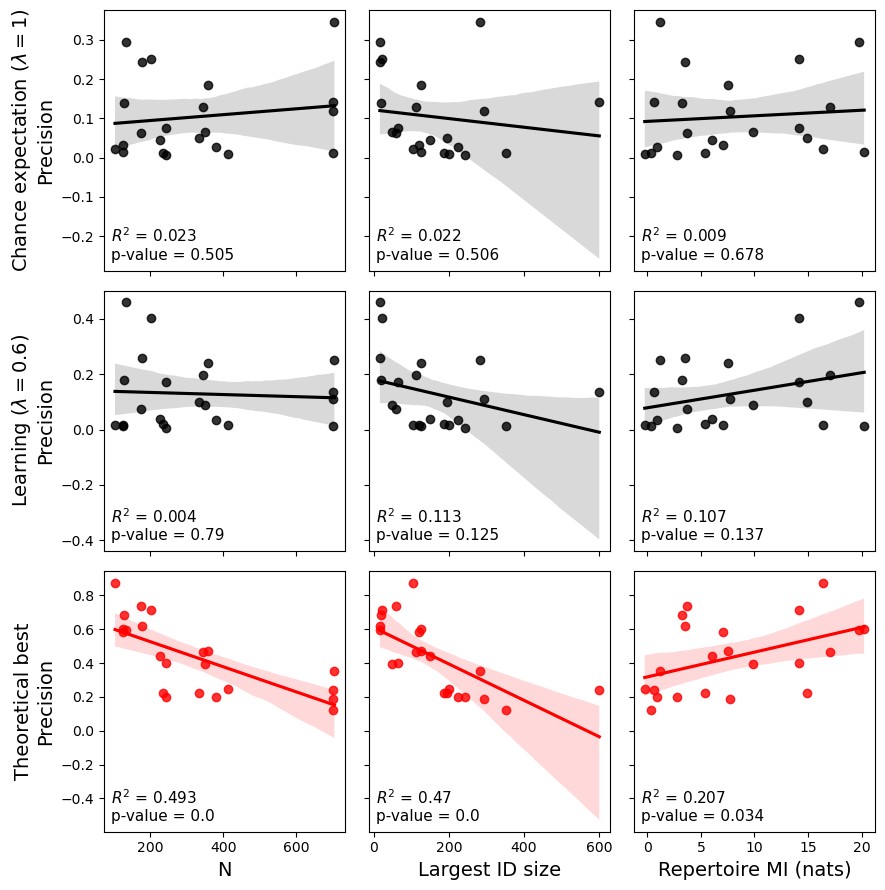

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex='col', sharey='row', figsize=(9,9))
titles = {'N':'N',
          'largest_id':'Largest ID size',
          'real_MI':'Repertoire MI (nats)'}
models = [r'Chance expectation ($\lambda=1$)', r'Learning ($\lambda=0.6$)','Theoretical best']

for j,df in enumerate([X0, X, X_best]):
    for w,c in enumerate(['N', 'largest_id', 'real_MI']):
        print(models[j], c)
        print(df.head())
        print(df[[c, 'prop_correct']])
        assert df.shape[0] == len(epitopes)
        p,R,R_adj = simple_regplot(df,[c],'prop_correct')
        # if j == 0:
        #     ax[j,w].set_title(titles[c], fontdict={'size':14})
        
        ax[j,w].text(0.03,0.03,r'$R^2$ = ' + str(R.round(3)) + '\np-value = ' + str(p.round(3)), 
                        transform=ax[j,w].transAxes, verticalalignment='bottom', horizontalalignment='left',
                        fontdict={'size':11})
        col= 'k'
        if p < 0.05:
            col='red'
        sns.regplot(data=df, x = c, y = 'prop_correct', ax=ax[j,w], color=col, x_ci='ci', ci=95)

        if w == 0:
            ax[j,w].set_ylabel(models[j]+'\nPrecision', fontsize=14)
        else:
            ax[j,w].set_ylabel('')
        if j == 2:
            ax[j,w].set_xlabel(titles[c], fontsize=14)
        else:
            ax[j,w].set_xlabel('')

plt.tight_layout()
plt.savefig(save_folder1 + 'MI-IPA_correlations_with_TPR.png',
                bbox_inches="tight")
plt.show()

In [23]:
X0['N_norm'] = (X0['N'] - X0['N'].mean())/X0['N'].mean()
X0['Na_norm'] = (X0['Na'] - X0['Na'].mean())/X0['Na'].mean()
X0['Nb_norm'] = (X0['Nb'] - X0['Nb'].mean())/X0['Nb'].mean()
X0['largest_id_norm'] =(X0['largest_id'] - X0['largest_id'].mean())/X0['largest_id'].mean()
X0['real_MI_norm'] = (X0['real_MI'] - X0['real_MI'].mean())/X0['real_MI'].mean()

In [24]:
X['N_norm'] = (X['N'] - X['N'].mean())/X['N'].mean()
X['Na_norm'] = (X['Na'] - X['Na'].mean())/X['Na'].mean()
X['Nb_norm'] = (X['Nb'] - X['Nb'].mean())/X['Nb'].mean()
X['largest_id_norm'] =(X['largest_id'] - X['largest_id'].mean())/X['largest_id'].mean()
X['real_MI_norm'] = (X['real_MI'] - X['real_MI'].mean())/X['real_MI'].mean()

In [25]:
X_best['N_norm'] = (X_best['N'] - X_best['N'].mean())/X_best['N'].mean()
X_best['Na_norm'] = (X_best['Na'] - X_best['Na'].mean())/X_best['Na'].mean()
X_best['Nb_norm'] = (X_best['Nb'] - X_best['Nb'].mean())/X_best['Nb'].mean()
X_best['largest_id_norm'] =(X_best['largest_id'] - X_best['largest_id'].mean())/X_best['largest_id'].mean()
X_best['real_MI_norm'] = (X_best['real_MI'] - X_best['real_MI'].mean())/X_best['real_MI'].mean()

In [26]:
X_ratio = pd.merge(X0,X_best, 
                    on=['epitope','real_MI','largest_id','Na','Nb','N',
                    'var1','var2', 'real_MI_norm','real','shuffle',
                    'largest_id_norm', 'Na_norm', 'Nb_norm', 'N_norm'])
X_ratio['prop_ratio'] = X_ratio['prop_correct_y']/X_ratio['prop_correct_x']

In [27]:
X_ratio1 = pd.merge(X0,X, 
                    on=['epitope','real_MI','largest_id','Na','Nb','N',
                    'var1','var2', 'real_MI_norm','real','shuffle',
                    'largest_id_norm', 'Na_norm', 'Nb_norm', 'N_norm'])
X_ratio1['prop_ratio'] = X_ratio['prop_correct_y']/X_ratio['prop_correct_x']

(array([5., 4., 1., 4., 1., 0., 0., 3., 2., 2.]),
 array([-1.03022688, -0.77455192, -0.51887695, -0.26320199, -0.00752702,
         0.24814795,  0.50382291,  0.75949788,  1.01517284,  1.27084781,
         1.52652277]),
 <BarContainer object of 10 artists>)

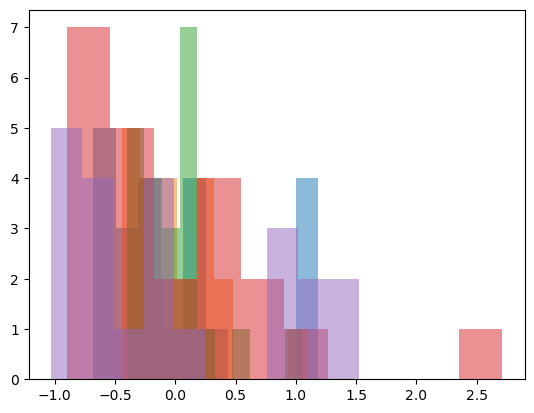

In [28]:
ax=plt.subplot()
ax.hist(X['N_norm'], alpha=0.5)
ax.hist(X['Na_norm'], alpha=0.5)
ax.hist(X['Nb_norm'], alpha=0.5)
ax.hist(X['largest_id_norm'], alpha=0.5)
ax.hist(X['real_MI_norm'], alpha=0.5)

In [29]:
X.head()

,real,shuffle,epitope,var1,var2,real_MI,L,Na,Nb,N,largest_id,counts-True,prop_correct,N_norm,Na_norm,Nb_norm,largest_id_norm,real_MI_norm
0,42.514086,28.393550,ASNENMETM,CDR3a,CDR3b,14.120535,0.6,1.571904,1.464015,201.0,23.0,81.170000,0.403831,-0.376481,-0.412261,-0.380742,-0.857969,0.762099
1,62.903822,42.657593,ATDALMTGF,CDR3a,CDR3b,20.246229,0.6,3.898914,1.875651,125.0,125.0,1.662651,0.013301,-0.612239,0.457814,-0.206626,-0.228092,1.526523
2,30.203834,29.848713,AVFDRKSDAK,CDR3a,CDR3b,0.355122,0.6,3.186300,2.482818,700.0,353.0,8.492000,0.012131,1.171461,0.191366,0.050197,1.179869,-0.955684
3,56.597613,50.543606,CINGVCWTV,CDR3a,CDR3b,6.054008,0.6,3.138194,2.634058,226.0,150.0,8.970000,0.039690,-0.298928,0.173379,0.114169,-0.073710,-0.244522
4,35.442074,34.560753,ELAGIGILTV,CDR3a,CDR3b,0.881321,0.6,2.715217,1.865787,380.0,225.0,13.660000,0.035947,0.178793,0.015227,-0.210798,0.389435,-0.890020


In [30]:
factors = ['N_norm','largest_id_norm','real_MI_norm']#'Na_norm','Nb_norm',

In [31]:
# no learning
pval,Rsq,Rsq_adj = simple_regplot(X0, x=factors, y='prop_correct') 

['N_norm', 'largest_id_norm', 'real_MI_norm'] prop_correct
prop_correct ~ N_norm + largest_id_norm + real_MI_norm
                            OLS Regression Results                            
Dep. Variable:           prop_correct   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1.815
Date:                Tue, 21 May 2024   Prob (F-statistic):              0.180
Time:                        03:13:32   Log-Likelihood:                 22.503
No. Observations:                  22   AIC:                            -37.01
Df Residuals:                      18   BIC:                            -32.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------

In [32]:
# learning model
pval,Rsq,Rsq_adj = simple_regplot(X, x=factors, y='prop_correct')

['N_norm', 'largest_id_norm', 'real_MI_norm'] prop_correct
prop_correct ~ N_norm + largest_id_norm + real_MI_norm
                            OLS Regression Results                            
Dep. Variable:           prop_correct   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2.504
Date:                Tue, 21 May 2024   Prob (F-statistic):             0.0919
Time:                        03:13:32   Log-Likelihood:                 18.083
No. Observations:                  22   AIC:                            -28.17
Df Residuals:                      18   BIC:                            -23.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------

In [33]:
pval,Rsq,Rsq_adj = simple_regplot(X_best, x=factors, y='prop_correct')

['N_norm', 'largest_id_norm', 'real_MI_norm'] prop_correct
prop_correct ~ N_norm + largest_id_norm + real_MI_norm
                            OLS Regression Results                            
Dep. Variable:           prop_correct   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     7.193
Date:                Tue, 21 May 2024   Prob (F-statistic):            0.00225
Time:                        03:13:32   Log-Likelihood:                 11.683
No. Observations:                  22   AIC:                            -15.37
Df Residuals:                      18   BIC:                            -11.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------

In [34]:
pval,Rsq,Rsq_adj = simple_regplot(X_ratio, x=factors, y='prop_ratio')

['N_norm', 'largest_id_norm', 'real_MI_norm'] prop_ratio
prop_ratio ~ N_norm + largest_id_norm + real_MI_norm
                            OLS Regression Results                            
Dep. Variable:             prop_ratio   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     3.245
Date:                Tue, 21 May 2024   Prob (F-statistic):             0.0463
Time:                        03:13:32   Log-Likelihood:                -80.539
No. Observations:                  22   AIC:                             169.1
Df Residuals:                      18   BIC:                             173.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [35]:
pval,Rsq,Rsq_adj = simple_regplot(X_ratio1, x=factors, y='prop_ratio')

['N_norm', 'largest_id_norm', 'real_MI_norm'] prop_ratio
prop_ratio ~ N_norm + largest_id_norm + real_MI_norm
                            OLS Regression Results                            
Dep. Variable:             prop_ratio   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     3.245
Date:                Tue, 21 May 2024   Prob (F-statistic):             0.0463
Time:                        03:13:32   Log-Likelihood:                -80.539
No. Observations:                  22   AIC:                             169.1
Df Residuals:                      18   BIC:                             173.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------